<a href="https://colab.research.google.com/github/ranshu1601/Big_Mart_data_Cleaning/blob/main/Big_Mart_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# for basic operations
import numpy as np 
import pandas as pd

#for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# read the dataset
data = pd.read_csv('bigmart.csv')

#Check the shape of the dataset
data.shape

(8523, 12)

In [19]:
# Analysing the data by checking first 5 values of the dataset
data.head()
 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
#here we found some NaN values, so let's check the null values from the dataset
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
'''from above we observe that these values have missing values
so we need to impute the missing values for accurate predictions '''
data['Item_Weight']= data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

#here, above we are filling up the missing values with the mean for item weight 
# and filling the outlet size by mode 
data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


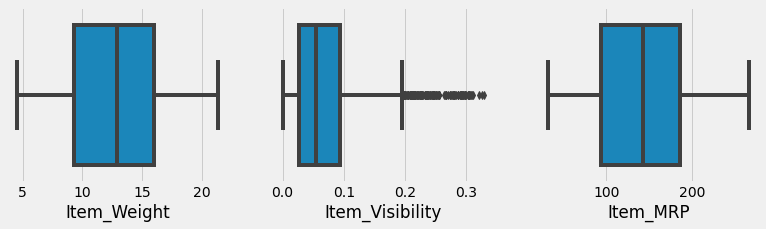

In [22]:
''' now , we are not left with any missing values 
Let's check if we have some outliers in the dataset 
To check outliers , we will use boxplot '''

plt.rcParams['figure.figsize']=(12,3) 
# here rc means runtime configuration rcParams stores all runtime settings
plt.style.use('fivethirtyeight')
#size is used to choose wht kinda of graph you want for the dataset

plt.subplot(1,3,1)
sns.boxplot(data['Item_Weight'])

plt.subplot(1,3,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(1,3,3)
sns.boxplot(data['Item_MRP'])
plt.show()

In [23]:
# from the graph above we can see that item visibility has outliers in it 
#now we have to get rid of the outliers
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


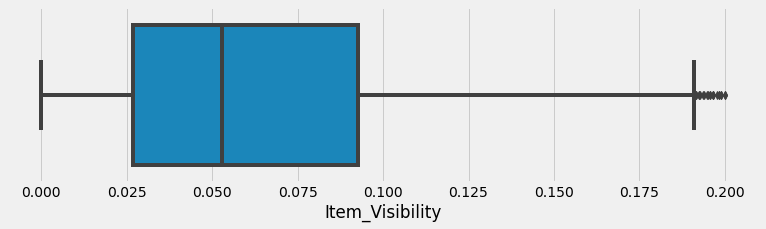

In [24]:
# Item Visibility has some outliers , LET's remove them
data = data[data['Item_Visibility']<=0.2]

#Lets check the item Visibility again
sns.boxplot(data['Item_Visibility'])

In [25]:
#  Now the outliers are removed , Let's clean the item Identifier column
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Lets check the values
data['Item_Identifier'].value_counts()



FD    6016
NC    1583
DR     790
Name: Item_Identifier, dtype: int64

In [26]:
data['Item_Fat_Content'].value_counts()

Low Fat    5024
Regular    2832
LF          307
reg         117
low fat     109
Name: Item_Fat_Content, dtype: int64

In [27]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(('low fat' , 'LF', 'reg'),('Low Fat', 'Low Fat' , 'Regular'))
data['Item_Fat_Content'].value_counts()

Low Fat    5440
Regular    2949
Name: Item_Fat_Content, dtype: int64